In [11]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import seaborn as sns
import matplotlib.pyplot as plt


Task 1: Feature Selection
1. Objective: Identify the most relevant features from a dataset.
2. Dataset: Use a sample dataset like the Titanic or Iris datasets.
3. Steps:
    Load the dataset.
    Analyze the correlation between features and the target variable.
    Use methods like mutual information or chi-squared test to select important features.
    Document the selected features and explain why they were chosen.


In [12]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [13]:
missing = df['age'].isna().sum()
missing

np.int64(177)

In [14]:
df = df.dropna(subset=['age', 'fare', 'embarked', 'sex'])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [15]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].astype('category').cat.codes

<ipython-input-15-68bf20bbc7c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map({'male': 0, 'female': 1})
<ipython-input-15-68bf20bbc7c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embarked'] = df['embarked'].astype('category').cat.codes


In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True


In [17]:
X = df[['pclass', 'sex', 'age', 'fare', 'sibsp', 'parch', 'embarked']]
y = df['survived']

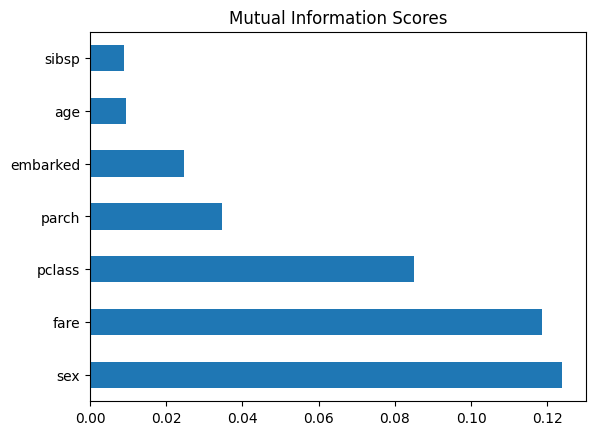

In [18]:
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns)
mi_series.sort_values(ascending=False).plot(kind='barh')
plt.title("Mutual Information Scores")
plt.show()

Selected top features

In [19]:
selected_features = mi_series.sort_values(ascending=False).head(4).index.tolist()
print("Selected Features:", selected_features)

Selected Features: ['sex', 'fare', 'pclass', 'parch']


Task 2: Feature Transformation
1. Objective: Apply transformations to existing features to improve model performance.
2. Dataset: Use the same dataset as Task 1.
3. Steps:
   Load the dataset.
   Apply transformations such as log transformation, normalization, or standardization.

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

Log transform on 'fare'

In [20]:
df['log_fare'] = np.log1p(df['fare'])

<ipython-input-20-13cb9aaa0126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_fare'] = np.log1p(df['fare'])


Normalize age

In [21]:
scaler = MinMaxScaler()
df['normalized_age'] = scaler.fit_transform(df[['age']])

<ipython-input-21-08bf8ac13417>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized_age'] = scaler.fit_transform(df[['age']])


Standardize fare

In [22]:
standard_scaler = StandardScaler()
df['standard_fare'] = standard_scaler.fit_transform(df[['fare']])

<ipython-input-22-6229b77e27e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['standard_fare'] = standard_scaler.fit_transform(df[['fare']])


In [23]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,log_fare,normalized_age,standard_fare
0,0,3,0,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False,2.110213,0.271174,-0.516380
1,1,1,1,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False,4.280593,0.472229,0.694046
2,1,3,1,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True,2.188856,0.321438,-0.503620
3,1,1,1,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False,3.990834,0.434531,0.350326
4,0,3,0,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True,2.202765,0.434531,-0.501257


Task 3: Feature Creation
1. Objective: Create new features from existing data.
2. Dataset: Use the same dataset as Task 1.
3. Steps:
● Create new features by combining or modifying existing ones (e.g., creating an
interaction term, extracting date features, etc.).


Create new feature: family size

In [24]:
df['family_size'] = df['sibsp'] + df['parch'] + 1

<ipython-input-24-9b42ec9f1720>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['family_size'] = df['sibsp'] + df['parch'] + 1


Interaction feature

In [25]:
df['fare_per_person'] = df['fare'] / df['family_size']

<ipython-input-25-9999fed19b54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fare_per_person'] = df['fare'] / df['family_size']


In [26]:
# Binary age group
df['is_child'] = (df['age'] < 12).astype(int)

print(df[['family_size', 'fare_per_person', 'is_child']].head())

   family_size  fare_per_person  is_child
0            2          3.62500         0
1            2         35.64165         0
2            1          7.92500         0
3            2         26.55000         0
4            1          8.05000         0


<ipython-input-26-df8dd52c402b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_child'] = (df['age'] < 12).astype(int)


Task 4: Polynomial Features
1. Objective: Generate polynomial features to capture non-linear relationships.
2. Dataset: Use a dataset with numerical features, such as the Boston housing dataset.
3. Steps:
● Load the dataset.
● Use the `PolynomialFeatures` class from `sklearn.preprocessing` to generate
polynomial features.


In [28]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures

# Load California Housing dataset
california = fetch_california_housing()
X_california = pd.DataFrame(california.data, columns=california.feature_names)

# Display column names to choose relevant ones
print("Available columns:", X_california.columns.tolist())

Available columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [31]:
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [29]:
# Generate polynomial features using two relevant columns (e.g., 'MedInc', 'AveRooms')
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_california[['MedInc', 'AveRooms']])

print("Polynomial shape:", X_poly.shape)

Polynomial shape: (20640, 5)


Task 5: Handling Categorical Features
1. Objective: Convert categorical features into numerical features.
2. Dataset: Use a dataset with categorical features, such as the Titanic dataset.
3. Steps:
● Load the dataset.
● Apply encoding techniques like one-hot encoding, label encoding, or target encoding.


In [32]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['embarked', 'class', 'who'], drop_first=True)

In [33]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex_label'] = le.fit_transform(df['sex'])

<ipython-input-33-0ba4c6a27de0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex_label'] = le.fit_transform(df['sex'])


In [37]:
df['sex_label'].head()

,sex_label
0,0
1,1
2,1
3,1
4,0


In [38]:
# Target encoding (optional for classification tasks)
# Example only; in practice, use `category_encoders` library for proper target encoding
target_mean = df.groupby('embarked')['survived'].mean()
df['embarked_target_encoded'] = df['embarked'].map(target_mean)

print(df[['sex_label', 'embarked_target_encoded']].head())

   sex_label  embarked_target_encoded
0          0                 0.362816
1          1                 0.607692
2          1                 0.362816
3          1                 0.362816
4          0                 0.362816


<ipython-input-38-f7851d1c1644>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embarked_target_encoded'] = df['embarked'].map(target_mean)
